# xgboost

In [6]:
import xgboost as xgb

In [7]:
xgb.__version__

'0.90'

## 데이터 로드

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [10]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

## 기본

In [3]:
from xgboost import XGBClassifier

In [4]:
xgb_clf = XGBClassifier()

In [11]:
xgb_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [12]:
evals = [(X_test, y_test)] # early-stoping을 위한 테스트 데이터셋
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_set=evals, eval_metric='logloss', verbose=True)

[0]	validation_0-logloss:0.612672
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.548594
[2]	validation_0-logloss:0.491682
[3]	validation_0-logloss:0.444937
[4]	validation_0-logloss:0.404631
[5]	validation_0-logloss:0.370265
[6]	validation_0-logloss:0.337242
[7]	validation_0-logloss:0.309684
[8]	validation_0-logloss:0.288152
[9]	validation_0-logloss:0.268289
[10]	validation_0-logloss:0.248541
[11]	validation_0-logloss:0.231275
[12]	validation_0-logloss:0.218079
[13]	validation_0-logloss:0.205034
[14]	validation_0-logloss:0.194406
[15]	validation_0-logloss:0.183511
[16]	validation_0-logloss:0.173277
[17]	validation_0-logloss:0.16423
[18]	validation_0-logloss:0.157468
[19]	validation_0-logloss:0.149561
[20]	validation_0-logloss:0.144181
[21]	validation_0-logloss:0.140104
[22]	validation_0-logloss:0.135176
[23]	validation_0-logloss:0.130046
[24]	validation_0-logloss:0.125908
[25]	validation_0-logloss:0.12248
[26]	validation_0-logloss:0.11931

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
xgb_clf.feature_importances_

array([0.00345626, 0.03208838, 0.        , 0.        , 0.00781435,
       0.00989557, 0.05250206, 0.16231401, 0.00422309, 0.        ,
       0.0126519 , 0.00894055, 0.00952203, 0.01211267, 0.00178637,
       0.00895398, 0.0106557 , 0.00066253, 0.00486274, 0.00122855,
       0.05695715, 0.02752199, 0.07055458, 0.28433886, 0.01251418,
       0.00458541, 0.03461018, 0.15111935, 0.0057479 , 0.0083796 ],
      dtype=float32)

## grid search

In [18]:
from sklearn.model_selection import GridSearchCV

In [17]:
xgb_param = {
    'n_estimators':[100,300],
    'max_depth':[3,5]
}

In [19]:
grid_xgb = GridSearchCV(xgb_clf, param_grid=xgb_param, cv=5)

In [20]:
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5], 'n_estimators': [100, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None,

In [22]:
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## 시각화

In [25]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

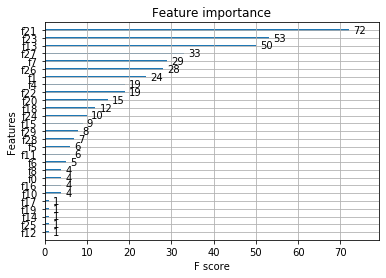

In [26]:
plot_importance(xgb_clf)
plt.show()